**DATASET INFORMATION**


* Loan_ID: This is a unique identifier for each loan application.

* Loan_Amount_Requested: The amount of money requested by the borrower in their loan application.

* Length_Employed: The length of time the borrower has been employed, typically measured in years or months.

* Home_Owner: Indicates the type of home ownership status of the borrower, such as "Rent", "Own", "Mortgage", or "Other".

* Annual_Income: The borrower's annual income, which represents their total earnings in a year.

* Income_Verified: Indicates whether the borrower's income has been verified. It can be a binary variable, such as "Verified" or "Not Verified".

* Purpose_Of_Loan: Describes the intended purpose of the loan, such as "Debt Consolidation", "Home Improvement", "Small Business", or others.

* Debt_To_Income: The borrower's debt-to-income ratio, which is calculated by dividing their total monthly debt payments by their monthly income.

* Inquiries_Last_6Mo: The number of inquiries made on the borrower's credit profile in the last six months.

* Months_Since_Deliquency: The number of months since the borrower's last delinquency, which refers to the failure to make required loan payments on time.

* Number_Open_Accounts: The total number of open credit accounts the borrower has, including both revolving and installment accounts.

* Total_Accounts: The overall number of credit accounts the borrower has, including open and closed accounts.

* Gender: Indicates the gender of the borrower, typically represented as "Male" or "Female".

* Interest_Rate: The interest rate assigned to the loan, which determines the cost of borrowing for the borrower.

# Import Libraries

* Install some packages.

In [ ]:
!pip install klib
!pip install miceforest --no-cache-dir
!pip install git+https://github.com/AnotherSamWilson/miceforest.git
!pip install scikit-optimize
!pip install bayesian-optimization
!pip install catboost

* Import some necessary libraries for the project.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import klib
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn import metrics, preprocessing, model_selection
import matplotlib.pyplot as plt
import miceforest as mf
from scipy import signal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from bayes_opt import BayesianOptimization
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Load Dataset

* Load data from github link.

In [ ]:
URL = 'https://raw.githubusercontent.com/TuanSunday/IntroML_Banking/master/Banking.csv'
df = pd.read_csv(URL)

# Data Analysis

## Overview

In [ ]:
df_a = df.copy()
df_a.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


* Extract the first 5 data points of the dataframe.

In [ ]:
df_a.shape

(164309, 14)

* The dataframe have 164309 data points and 14 features.

In [ ]:
df_a.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


* Based on the describe table above, it is clear that the data does not contain negative values.

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=["Dtypes"])
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name", "Dtypes"]]
    summary["Min"] = np.nan
    summary["Max"] = np.nan
    summary["Uniques"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Missing %"] = (df.isnull().sum().values / df.shape[0]) * 100
    summary["First Value"] = df.iloc[0].values
    summary["Mode Value"] = df.mode().iloc[0].values

    for name in summary["Name"].value_counts().index:
        if summary.loc[summary["Name"] == name, "Dtypes"].iloc[0] != "object":
            summary.loc[summary["Name"] == name, "Min"] = df[name].min()
            summary.loc[summary["Name"] == name, "Max"] = df[name].max()

        summary.loc[summary["Name"] == name, "Entropy"] = round(stats.entropy(df[name].value_counts(normalize=True), base=2), 2)

    return summary


* This is a function which represents the `Dtypes`, `Min`, `Max`, `Uniques`, `Missing`, `Missing %`, `First Value`, `Mode Value`, `Entropy` of each feature in the dataset.

In [ ]:
resumetable(df.drop('Loan_ID', axis= 1))

Dataset Shape: (164309, 13)


,Name,Dtypes,Min,Max,Uniques,Missing,Missing %,First Value,Mode Value,Entropy
0,Loan_Amount_Requested,object,NaN,NaN,1290,0,0.000000,"7,000","10,000",7.14
1,Length_Employed,object,NaN,NaN,11,7371,4.486060,< 1 year,10+ years,3.10
2,Home_Owner,object,NaN,NaN,5,25349,15.427639,Rent,Mortgage,1.34
3,Annual_Income,float64,4000.0,7500000.00,12305,25102,15.277313,68000.0,60000.0,8.19
4,Income_Verified,object,NaN,NaN,3,0,0.000000,not verified,VERIFIED - income,1.58
5,Purpose_Of_Loan,object,NaN,NaN,14,0,0.000000,car,debt_consolidation,1.90
6,Debt_To_Income,float64,0.0,39.99,3953,0,0.000000,18.37,18.0,11.60
7,Inquiries_Last_6Mo,int64,0.0,8.00,9,0,0.000000,0,0,1.75
8,Months_Since_Deliquency,float64,0.0,180.00,122,88379,53.788289,NaN,9.0,6.28
9,Number_Open_Accounts,int64,0.0,76.00,58,0,0.000000,9,9,4.23


* There are several features that have an incorrect data type.
* Some features have values that contain special characters such `,` in `Loan_Amount_Requested` or `<` in `Length_Employed`.
* Some features contain quite a lot of missing values ​​and need to be handled (`Months_Since_Deliquency` has more than 53% ratio missing values, too much).

**Process data to facilitate data analysis**

In [ ]:
df_a.drop('Loan_ID', axis= 1, inplace= True)
df_a['Loan_Amount_Requested'] = df_a['Loan_Amount_Requested'].apply(lambda x: int(x.replace(',', '')))
df_a['Length_Employed'] = df_a['Length_Employed'].replace('< 1 year', '0.5 years')
df_a['Length_Employed'] = df_a['Length_Employed'].replace('10+ years', '11 years')
df_a['Length_Employed'] = df_a['Length_Employed'].str.split(expand=True)[0].astype(float)

* Handle `Loan_Amount_Requested` feature by separating commas in records and convert to int type.
* Handle `Length_Employed` feature:
  * Convert `<1 year` into `0.5 years` to represent employment for less than 1 year.
  * Convert `10+ years` into `11 years` to represent employment for more than 10 years.
  * Convert to float type.
  

In [ ]:
obj_columns = df_a.drop('Interest_Rate', axis = 1).select_dtypes(include='object').columns
num_columns = df_a.drop('Interest_Rate', axis = 1).select_dtypes(include=[np.number]).columns
for i in obj_columns:
  print('-',i, ': ',df_a[i].unique(), ', nvalues: ', df_a[i].nunique())

- Home_Owner :  ['Rent' 'Mortgage' nan 'Own' 'Other' 'None'] , nvalues:  5
- Income_Verified :  ['not verified' 'VERIFIED - income' 'VERIFIED - income source'] , nvalues:  3
- Purpose_Of_Loan :  ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy'] , nvalues:  14
- Gender :  ['Female' 'Male'] , nvalues:  2


* It is clear that the `Home_Owner` feature contains a `nan` class, similar to the presence of missing values in this feature.

In [ ]:
sns.pairplot(data = df_a, hue = 'Interest_Rate', palette = "mako")

* The pairlot charts shows the relationship between the features in the dataset.

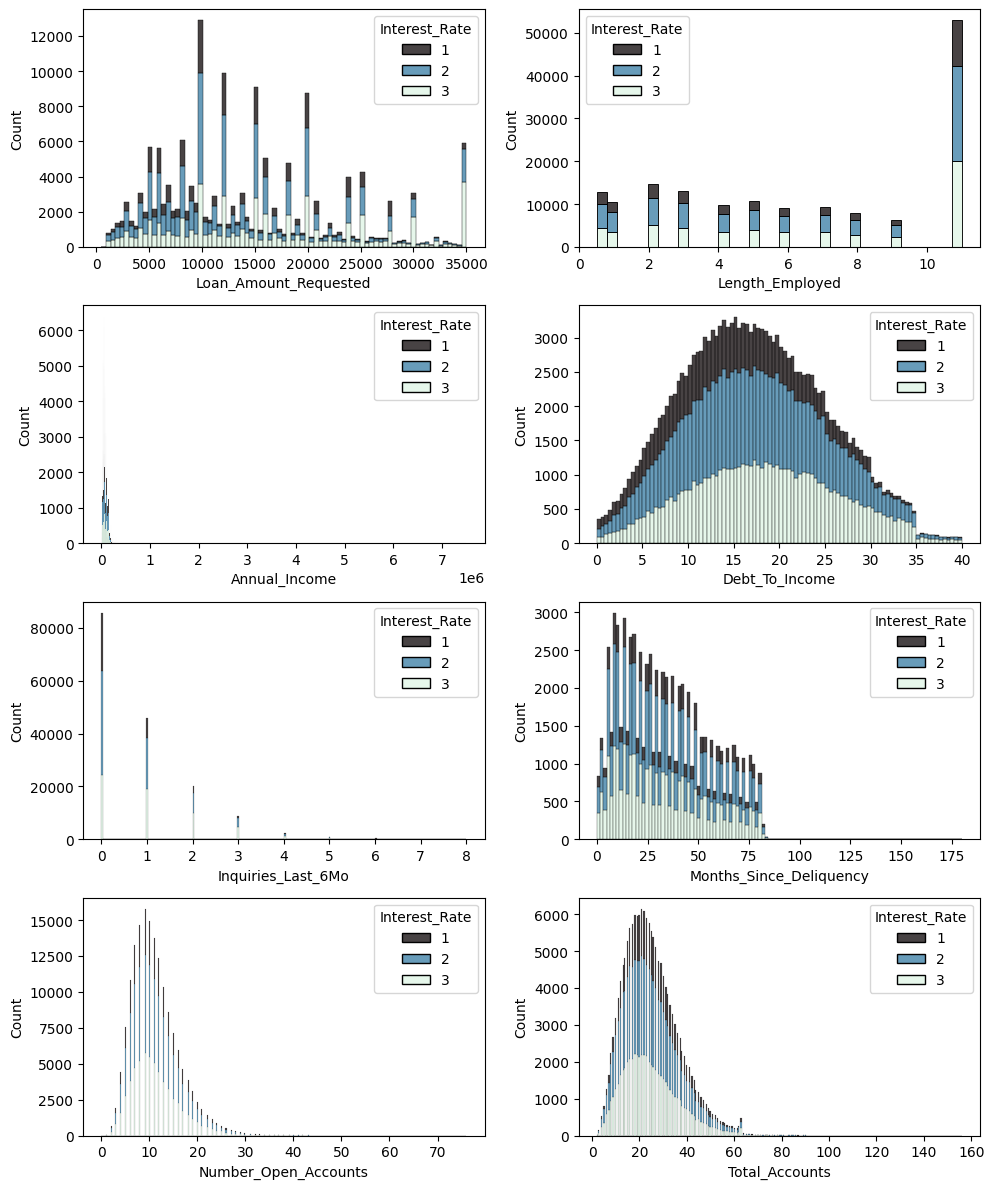

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 2, figsize = (10,12))
for it, col in enumerate(num_columns):
  i = it//2
  j = it%2
  sns.histplot(df_a, x=col, hue="Interest_Rate", fill=True, multiple="stack",palette = "mako",ax = ax[i][j])

plt.tight_layout()
plt.show()

* Based on the histogram for numerical features, it is clear that some features suffer from skewness, indicating an uneven distribution of values and the presence of outliers.

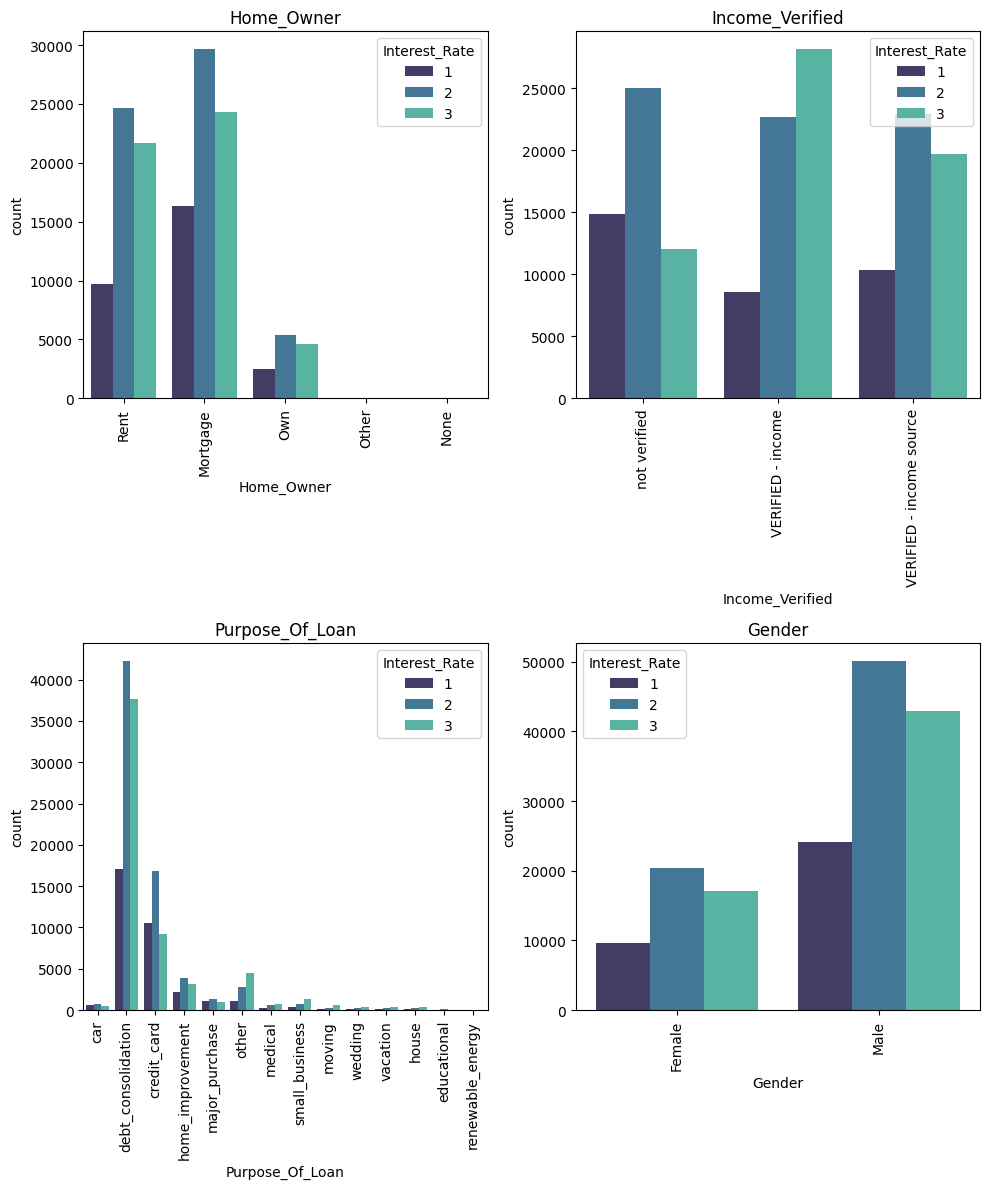

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2, figsize = (10,12))
for it, col in enumerate(obj_columns):
  i = it//2
  j = it%2
  sns.countplot(df_a, x=col, hue="Interest_Rate", fill=True,palette = "mako",ax = ax[i][j],)
  ax[i][j].title.set_text(col)
  ax[i][j].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

* Here are the charts depicting the distribution of classes within the features corresponding to the classes in the target feature `Interest_Rate`.
* One highlight is that the distributions of classes in the target feature are unevenly distributed compared to other classes.

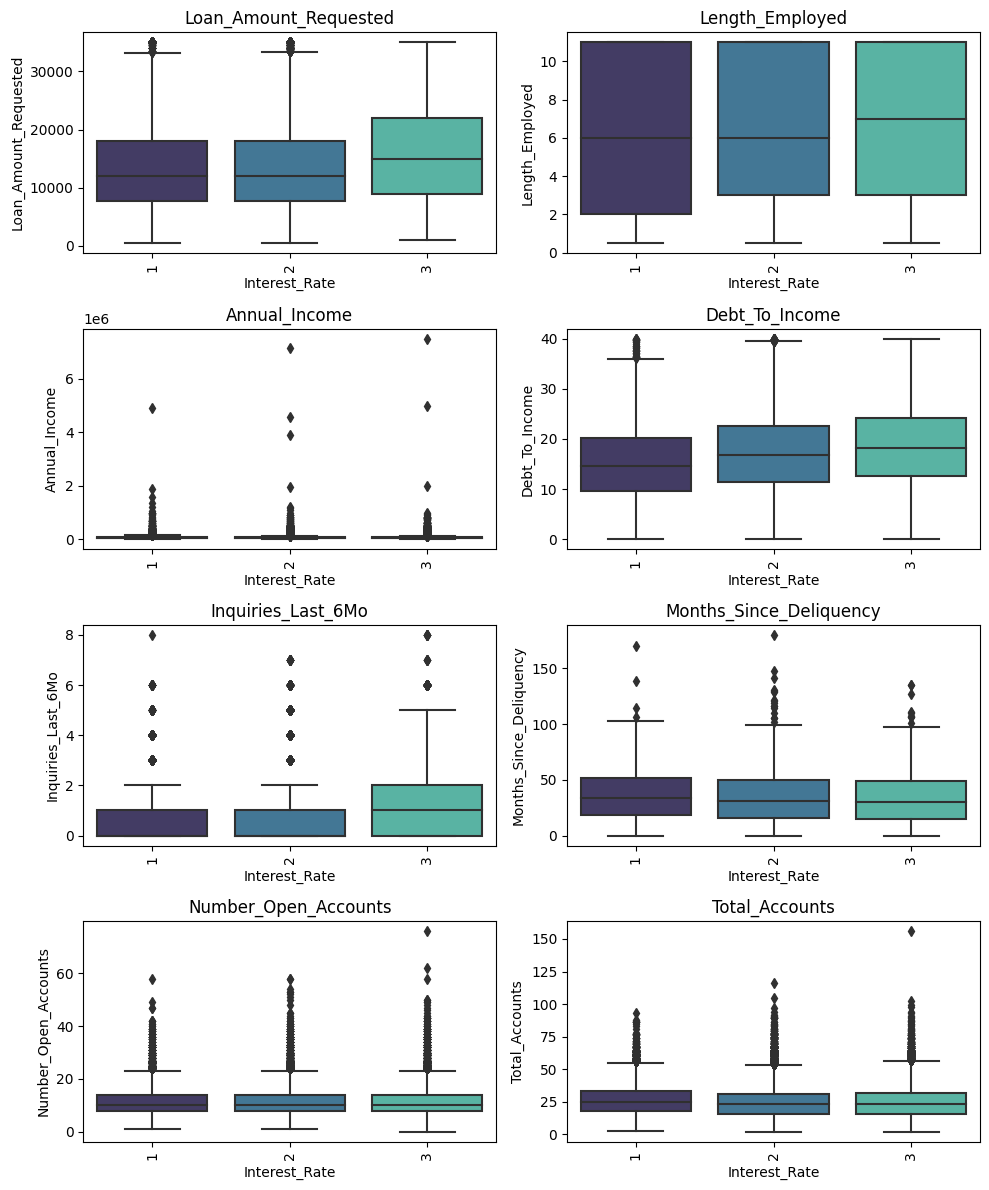

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 2, figsize = (10,12))
for it, col in enumerate(num_columns):
  i = it//2
  j = it%2
  sns.boxplot(df_a, y=col, x="Interest_Rate",palette = "mako",ax = ax[i][j])
  ax[i][j].title.set_text(col)
  ax[i][j].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

* Features like `Annual_Income`, `Number_Open_Accounts`, `Total_Accounts`, ... contain a large number of outliers. Specially, the presence of outliers significantly impacts the model's performance, so we need to handle them carefully.

<Axes: title={'center': 'Feature-correlation (pearson)'}>

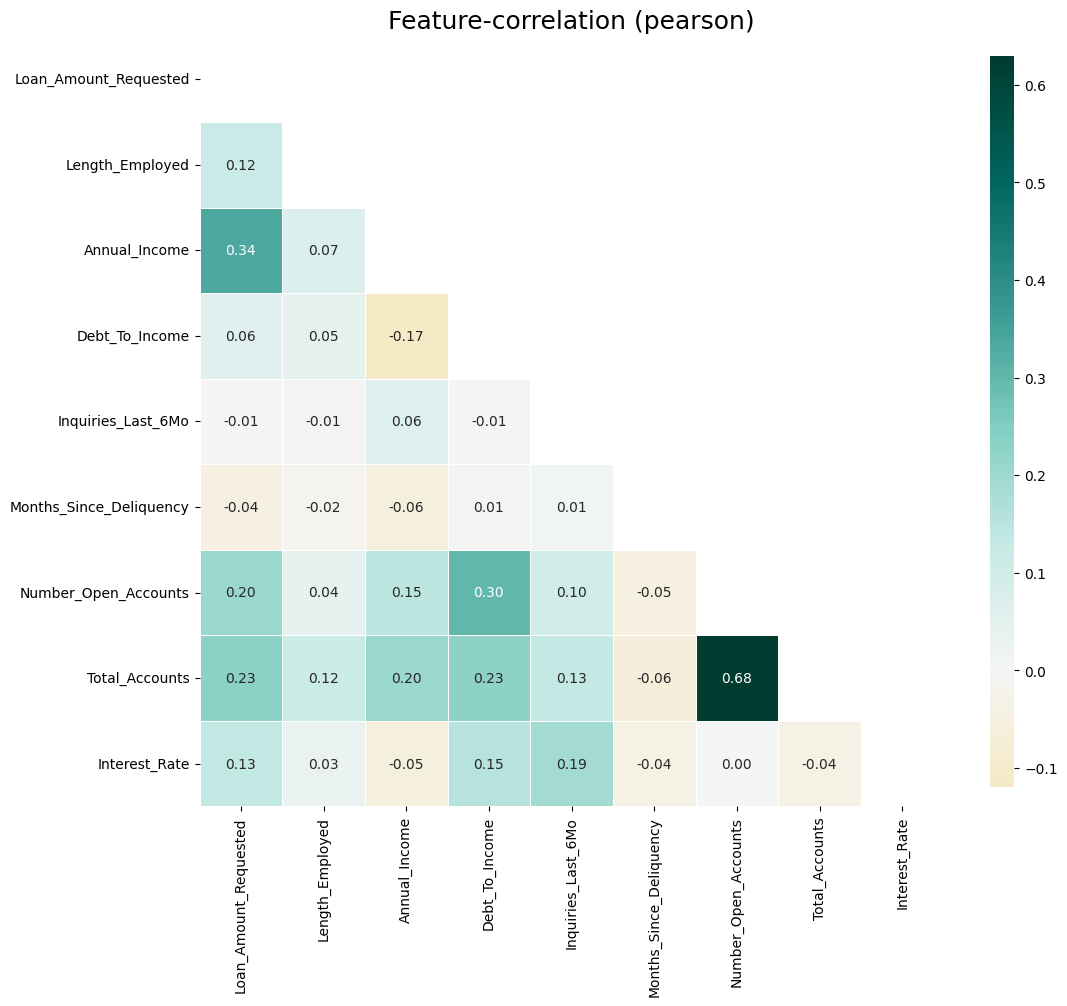

In [ ]:
klib.corr_plot(df_a)

* The matrix shows the correlation between features.
* Specially, `Interest_Rate` has the strongest correlation with `Inquiries_Last_6Mo`, `Debt_To_Income`, and `Loan_Amount_Requested`.
* Additionally, there are strong correlations between pairs of features, such as `Number_Open_Accounts` and `Total_Accounts`, with approximately **68%** correlation.

## Missing value

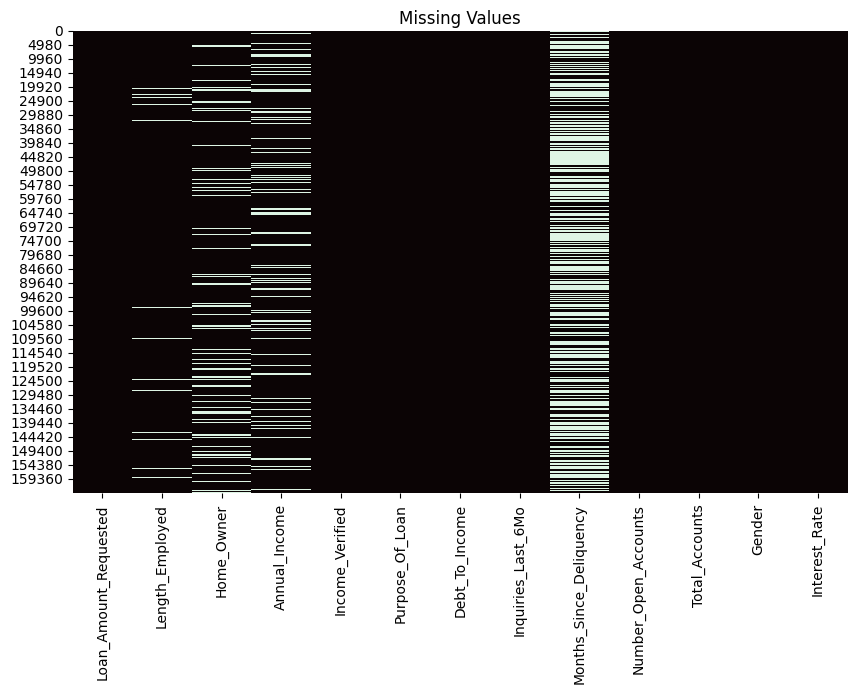

In [ ]:
# Tạo heatmap để biểu diễn giá trị thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df_a.isnull(), cmap='mako', cbar=False)
plt.title('Missing Values')
plt.show()


* It can be seen that `Months_Since_Deliquency` (around 50% of the data) has the highest number of missing values, followed by `Annual_Income`, `Home_Owner`, and `Length_Employed`.

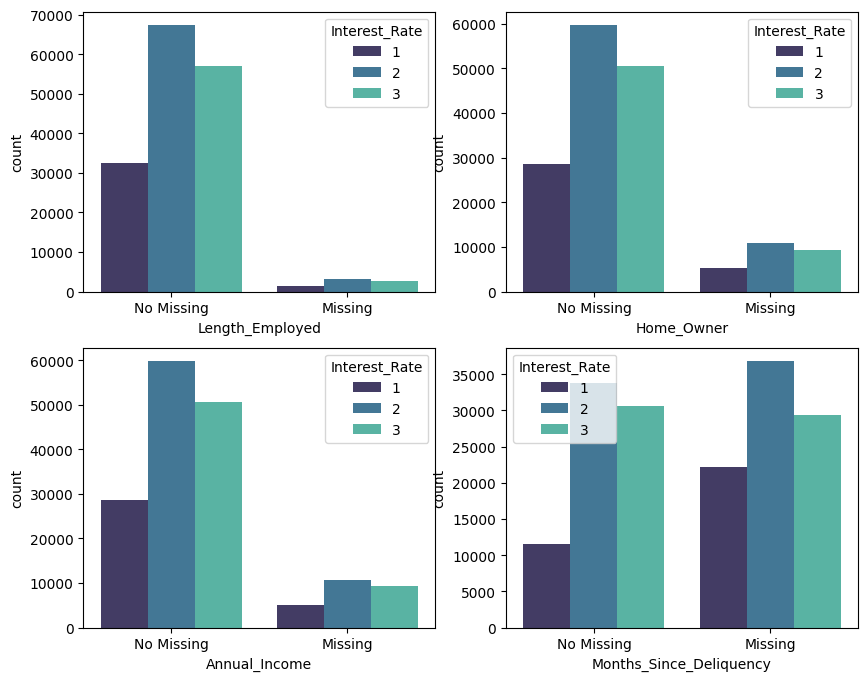

In [ ]:
col_nan = ['Length_Employed', 'Home_Owner', 'Annual_Income','Months_Since_Deliquency']
fig,axes = plt.subplots(nrows = 2,ncols = 2, figsize = (10,8))
i,j = 0,0
for col in col_nan:
  sns.countplot(x = df_a[col].isna(),hue = df_a['Interest_Rate'],palette = "mako",ax = axes[i][j]);
  axes[i][j].set_xticks([False,True],['No Missing','Missing'])
  if j == 1:
    i = 1
    j = -1
  j += 1

* The following charts illustrate the number of `interest_rate` predictions based on the presence or absence of missing values for each feature.
* Additionally, the impact of missing values is higher than no missing values in `Months_Since_Deliquency`.

# Preprocessing

In [ ]:
df_num = df.drop(['Loan_ID', 'Interest_Rate'], axis= 1).select_dtypes(include=[np.number])
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column Annual_Income are 5881
Total number of Outliers in column Debt_To_Income are 12
Total number of Outliers in column Inquiries_Last_6Mo are 12276
Total number of Outliers in column Months_Since_Deliquency are 30
Total number of Outliers in column Number_Open_Accounts are 3754
Total number of Outliers in column Total_Accounts are 3099


* Show the number of outlier values for the above features that require processing.

In [ ]:
def preprocessing_data(df):
    # replace ID column
    # Fix values to standard data types
    df.drop('Loan_ID', axis= 1, inplace= True)
    df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].apply(lambda x: int(x.replace(',', '')))
    df['Length_Employed'] = df['Length_Employed'].replace('< 1 year', '0.5 years')
    df['Length_Employed'] = df['Length_Employed'].replace('10+ years', '10.5 years')
    df['Length_Employed'] = df['Length_Employed'].str.split(expand=True)[0].astype(float)
    df['Deliquency_Status'] = df['Months_Since_Deliquency'].apply(lambda x: 1 if x>=0 else 0) # 88k nan
    df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].interpolate(limit_direction= 'both')

    # outlier processing
    df.loc[df["Annual_Income"] > Q3["Annual_Income"] + 1.5*IQR["Annual_Income"], "Annual_Income"] = df["Annual_Income"].quantile(0.85)
    df.loc[df["Annual_Income"] < Q1["Annual_Income"] - 1.5*IQR["Annual_Income"], "Annual_Income"] = df["Annual_Income"].quantile(0.15)
    df.loc[df["Inquiries_Last_6Mo"] > Q3["Inquiries_Last_6Mo"] + 1.5*IQR["Inquiries_Last_6Mo"], "Inquiries_Last_6Mo"] = df["Inquiries_Last_6Mo"].quantile(0.85)
    df.loc[df["Inquiries_Last_6Mo"] < Q1["Inquiries_Last_6Mo"] - 1.5*IQR["Inquiries_Last_6Mo"], "Inquiries_Last_6Mo"] = df["Inquiries_Last_6Mo"].quantile(0.15)
    df.loc[df["Number_Open_Accounts"] > Q3["Number_Open_Accounts"] + 1.5*IQR["Number_Open_Accounts"], "Number_Open_Accounts"] = df["Number_Open_Accounts"].quantile(0.85)
    df.loc[df["Number_Open_Accounts"] < Q1["Number_Open_Accounts"] - 1.5*IQR["Number_Open_Accounts"], "Number_Open_Accounts"] = df["Number_Open_Accounts"].quantile(0.15)
    df.loc[df["Total_Accounts"] > Q3["Total_Accounts"] + 1.5*IQR["Total_Accounts"], "Total_Accounts"] = df["Total_Accounts"].quantile(0.85)
    df.loc[df["Total_Accounts"] < Q1["Total_Accounts"] - 1.5*IQR["Total_Accounts"], "Total_Accounts"] = df["Total_Accounts"].quantile(0.15)
    # Null processing
    kds = mf.ImputationKernel(
      df[['Annual_Income','Length_Employed','Months_Since_Deliquency']],
      save_all_iterations=True,
      random_state=42
    )
    # Run the MICE algorithm for 2 iterations
    kds.mice(iterations=100, n_estimators=50)
    df[['Annual_Income','Length_Employed','Months_Since_Deliquency']] = kds.complete_data()
    df['Annual_Income_Type' ] = pd.cut(x= df['Annual_Income'], bins = [-1, 2e+04, 4e+04, 6e+04, 8e+08, np.inf], labels= ['Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5'])
    df['Length_Employed_Type' ] = pd.cut(x= df['Length_Employed'], bins = [-1, 1, 3, 5, 10, 50], labels= ['Fresher', 'Mid_Fresher', 'Junior', 'Mid_Junior', 'Senior'])
    df['Home_Owner'] = df.groupby(['Annual_Income_Type', 'Length_Employed_Type'])['Home_Owner'].transform(lambda x: x.fillna(x.mode().iloc[0]))
    df = df.drop(['Annual_Income_Type'],axis = 1)
    df = df.drop(['Length_Employed_Type'],axis = 1)

    # Return the completed dataset.
    return df

**Steps in this preprocessing stage include:**
* **Step 1**: Drop unnecessary feature (`Loan_ID`).
* **Step 2**:
	* Handle `Loan_Amount_Requested` feature by separating commas in records and convert to int type.
	* Handle `Length_Employed` feature:
	  * Convert `<1 year` into `0.5 years` to represent employment for less than 1 year.
	  * Convert `10+ years` into `11 years` to represent employment for more than 10 years.
	  * Convert to float type.
  * Create new feature `Deliquency_Status` by comparing the value of the feature `Months_Since_Deliquency`.
* **Step 3**: Handle outlier values using IQR technique by replacing lower bound and upper bound outlier values by 20% and 80% quantile value.
* **Step 4**: Address missing values in numerical features using `MICE algorithm ` with 100 iterations
* **Step 5**: Split data of 2 `Annual_Income` and `Length_Employed` features into `Annual_Income_Type` and `Length_Employed_Type`. From these new features we continue to fill in the missing values of `Home_Owner` by the mode value that occurs most frequently by `Annual_Income_Type` and `Length_Employed_Type` using group_by.

In [ ]:
df_preprocessed = preprocessing_data(df.copy())

In [ ]:
np.sum(df_preprocessed.isnull())

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
Deliquency_Status          0
dtype: int64

* Check if there are any remaining missing values after applying the data preprocessing steps.

In [ ]:
resumetable(df_preprocessed)

Dataset Shape: (164309, 14)


,Name,Dtypes,Min,Max,Uniques,Missing,Missing %,First Value,Mode Value,Entropy
0,Loan_Amount_Requested,int64,500.0,35000.00,1290,0,0.0,7000,10000,7.14
1,Length_Employed,float64,0.5,10.50,11,0,0.0,0.5,10.5,3.10
2,Home_Owner,object,NaN,NaN,5,0,0.0,Rent,Mortgage,1.30
3,Annual_Income,float64,4000.0,154010.00,11637,0,0.0,68000.0,105000.0,7.86
4,Income_Verified,object,NaN,NaN,3,0,0.0,not verified,VERIFIED - income,1.58
5,Purpose_Of_Loan,object,NaN,NaN,14,0,0.0,car,debt_consolidation,1.90
6,Debt_To_Income,float64,0.0,39.99,3953,0,0.0,18.37,18.0,11.60
7,Inquiries_Last_6Mo,int64,0.0,2.00,3,0,0.0,0,0,1.47
8,Months_Since_Deliquency,float64,0.0,180.00,3866,0,0.0,17.0,14.0,8.55
9,Number_Open_Accounts,int64,0.0,23.00,24,0,0.0,9,9,4.10


* Besides, use the pre-defined function `resumetable` to get an overview of the data after performing preprocessing steps before deeping into the feature engineering process as well as applying the machine learning model.

# Feature Engineering

In [ ]:
def apply_feature_engineering(df):
    # Discetization features:
    df['Loan_Amount_Requested_Type'] = pd.qcut(x= df['Loan_Amount_Requested'], q = 4, labels= ['Type_1', 'Type_2', 'Type_3', 'Type_4'])
    # Features Generating:
    df['Loan_Amount_Requested_ratio_Annual_Income'] = df['Loan_Amount_Requested']/df['Annual_Income']
    df['Number_Open_Accounts_ratio_Total_Accounts'] = df['Number_Open_Accounts']/df['Total_Accounts']
    df['Debt_To_Income_ratio_Total_Accounts'] = df['Debt_To_Income']/df['Total_Accounts']
    df['Loan_Amount_Requested_ratio_Total_Accounts'] = df['Loan_Amount_Requested']/df['Total_Accounts']
    df['Closed_Accounts'] = df['Total_Accounts'] - df['Number_Open_Accounts']
    df['Monthly_Income'] = df['Annual_Income']/12
    df['Safe_Customer'] = ((df['Income_Verified'] != 'not verified') & (df['Loan_Amount_Requested'] <= 10000))
    df['Warning_Customer'] = ((df['Income_Verified'] == 'not verified') & (df['Loan_Amount_Requested'] > 10000))
    # change str type
    cols = df.drop('Interest_Rate', axis=1).select_dtypes(exclude=np.number).columns.tolist()
    for col in cols:
      encoder = preprocessing.OneHotEncoder()
      encoded_data = encoder.fit_transform(df[col].values.reshape(-1, 1)).toarray()
      encoded_column_names = encoder.get_feature_names_out([col])
      encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)
      df = df.drop(col, axis=1)
      df = pd.concat([df, encoded_df], axis=1)

    return df


**Steps in this feature-engineering stage include:**
* **Step 1**: Create a new features `Loan_Amount_Requested_Type` by splitting `Loan_Amount_Requested` to 4 labels
* **Step 2**: Create ratio features by dividing the main features with the relevant features.
* **Step 3**:
  * Calculate the number of `Closed_Accounts` by subtracting `Total_Accounts` from `Number_Open_Accounts`.
  * Estimate `Monthly_Income` by dividing `Annual_Income` by twelve months.
  * Identify `Safe_Customer` if `Income_Verified` is different from **not verified** and `Loan_Amount_Requested` <= 100000.
  * Identify `Warning_Customer` if `Income_Verified` is **not verified** and `Loan_Amount_Requested` > 100000.
* **Step 4**: Use OneHot Encoding to handle categorical features.

In [ ]:
df_engineered = apply_feature_engineering(df_preprocessed.copy())

In [ ]:
resumetable(df_engineered)

Dataset Shape: (164309, 48)


,Name,Dtypes,Min,Max,Uniques,Missing,Missing %,First Value,Mode Value,Entropy
0,Loan_Amount_Requested,int64,500.000000,35000.000000,1290,0,0.0,7000.000000,10000.0,7.14
1,Length_Employed,float64,0.500000,10.500000,11,0,0.0,0.500000,10.5,3.10
2,Annual_Income,float64,4000.000000,154010.000000,11637,0,0.0,68000.000000,105000.0,7.86
3,Debt_To_Income,float64,0.000000,39.990000,3953,0,0.0,18.370000,18.0,11.60
4,Inquiries_Last_6Mo,int64,0.000000,2.000000,3,0,0.0,0.000000,0.0,1.47
5,Months_Since_Deliquency,float64,0.000000,180.000000,3866,0,0.0,17.000000,14.0,8.55
6,Number_Open_Accounts,int64,0.000000,23.000000,24,0,0.0,9.000000,9.0,4.10
7,Total_Accounts,int64,2.000000,54.000000,53,0,0.0,14.000000,21.0,5.38
8,Interest_Rate,int64,1.000000,3.000000,3,0,0.0,1.000000,2.0,1.52
9,Deliquency_Status,int64,0.000000,1.000000,2,0,0.0,0.000000,0.0,1.00


* Show the overview of the dataframe after applying feature engineering.

# Modeling


In [ ]:
X = df_engineered.drop(['Interest_Rate'],axis = 1)
y = df_engineered['Interest_Rate']

## Split Train, Validation and Test Set

In [ ]:
X_train, X_dev, y_train,y_dev = train_test_split(X,y,train_size=0.8,random_state=8, stratify= y) # , stratify= y
X_dev, X_test, y_dev, y_test = train_test_split(X_dev,y_dev,train_size=0.5,random_state=191, stratify= y_dev) # , stratify= y_dev
valid_set = (X_dev, y_dev - 1)
print('X Train Set Shape: ',X_train.shape)
print('X Validation Set Shape: ',X_dev.shape)
print('X Test Set Shape: ',X_test.shape)

X Train Set Shape:  (131447, 47)
X Validation Set Shape:  (16431, 47)
X Test Set Shape:  (16431, 47)


## Using Bayes Optimizer to find a optimal Model Structure

In [ ]:
class BayesOptimizer:
    def __init__(self, bounds,X_train,y_train,X_dev,y_dev):
        self.bounds = bounds
        self.X_train = X_train
        self.y_train = y_train
        self.X_dev = X_dev
        self.y_dev = y_dev

    def build_model_using_sequential(self, hidden_units1, hidden_units2, hidden_units3, hidden_units4, learning_rate):
        model = Sequential([
            layers.Dense(hidden_units1, kernel_initializer=keras.initializers.HeNormal(), activation='leaky_relu'),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.Dense(hidden_units2, kernel_initializer=keras.initializers.HeNormal(), activation='leaky_relu'),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.Dense(hidden_units3, kernel_initializer=keras.initializers.HeNormal(), activation='leaky_relu'),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.Dense(hidden_units4, kernel_initializer=keras.initializers.HeNormal(), activation='leaky_relu'),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.Dense(3)
        ])

        model.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=Adam(learning_rate=learning_rate),
            metrics=['acc'],
        )

        return model

    def target_function(self, hidden_units1, hidden_units2, hidden_units3, hidden_units4, learning_rate):
        model = self.build_model_using_sequential(hidden_units1, hidden_units2, hidden_units3, hidden_units4, learning_rate)
        model.fit(np.asarray(self.X_train).astype(np.float32), self.y_train - 1, epochs=10, batch_size=256, verbose=0,
                  validation_data=(self.X_dev,self.y_dev-1), validation_split=0.3)
        _, accuracy = model.evaluate(np.asarray(self.X_dev).astype(np.float32),  self.y_dev-1, verbose=0)
        return accuracy

    def optimize(self, init_points, n_iter):
        optimizer = BayesianOptimization(f=self.target_function, pbounds=self.bounds, random_state=42)
        optimizer.maximize(init_points=init_points, n_iter=n_iter)

# Define the bounds for the parameters
bounds = {
    'hidden_units1': (32, 256),
    'hidden_units2': (32, 256),
    'hidden_units3': (16, 128),
    'hidden_units4': (16, 128),
    'learning_rate': (0.001, 0.1)
}

# Create an instance of the ModelOptimizer class
Scaler = RobustScaler()
X_train_opt = Scaler.fit_transform(X_train)
X_dev_opt = Scaler.transform(X_dev)
optimizer = BayesOptimizer(bounds, X_train_opt, y_train, X_dev_opt, y_dev)
# Optimize the model
optimizer.optimize(init_points=5, n_iter=15)

|   iter    |  target   | hidden... | hidden... | hidden... | hidden... | learni... |
-------------------------------------------------------------------------------------
| 1         | 0.5375    | 115.9     | 245.0     | 97.98     | 83.05     | 0.01645   |
| 2         | 0.5351    | 66.94     | 45.01     | 113.0     | 83.32     | 0.0711    |
| 3         | 0.5411    | 36.61     | 249.3     | 109.2     | 39.78     | 0.019     |
| 4         | 0.524     | 73.08     | 100.2     | 74.77     | 64.38     | 0.02983   |
| 5         | 0.5326    | 169.1     | 63.25     | 48.72     | 57.03     | 0.04615   |
| 6         | 0.4913    | 117.4     | 240.2     | 92.65     | 85.6      | 0.07603   |
| 7         | 0.5267    | 235.0     | 55.6      | 32.49     | 119.6     | 0.0773    |
| 8         | 0.539     | 162.8     | 42.7      | 20.01     | 27.71     | 0.02409   |
| 9         | 0.5343    | 137.0     | 254.4     | 119.2     | 64.36     | 0.03224   |
| 10        | 0.5316    | 212.9     | 71.38     | 51.4

## Implement and Tune Model With Tensorflow

In [ ]:
class MLP(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = None
        self.pipe = None

    def set_pipeline(self, pipe = None):
        if pipe is not None:
            self.pipe = pipe
        return self

    def fit(self, X, y=None, valid_set=None, lr=0.001, epochs = 10):
        self.model = keras.models.Sequential([
            layers.Dense(256, kernel_initializer=keras.initializers.HeNormal(), activation='leaky_relu'),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.Dense(128, kernel_initializer=keras.initializers.HeNormal(), activation='leaky_relu'),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.Dense(64, kernel_initializer=keras.initializers.HeNormal(), activation='leaky_relu'),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.Dense(3)
        ])
        self.model.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
            optimizer=keras.optimizers.Adamax(learning_rate=lr),
            metrics=['accuracy']
        )
        # Preprocess the validation set using the pipeline which was fitted by the Train set (Using statistic of Train set to scaler Validation set)
        if valid_set is not None:
            X_valid, y_valid = valid_set
            X_valid = np.asarray(X_valid).astype(np.float32)
            if self.pipe is not None:
                scaler = FunctionTransformer(self.pipe.named_steps['scaler'].transform, validate=False)
                X_valid = scaler.transform(X_valid)
            valid_set = (X_valid, y_valid)

        self.model.fit(np.asarray(X).astype(np.float32), y, epochs= epochs, batch_size=512, verbose=1,
                       validation_data=valid_set)
        return self

    def predict(self, X):
        X = np.asarray(X).astype(np.float32)
        predictions = self.model.predict(X)
        return np.argmax(predictions.reshape(-1, predictions.shape[-1]), axis=1)

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('mlp', MLP())
])
pipeline.named_steps['mlp'].set_pipeline(pipe = pipeline);
pipeline.fit(X_train.values, y_train - 1, mlp__valid_set=valid_set, mlp__lr = 0.0025, mlp__epochs = 35)


Epoch 1/35
257/257 [==============================] - 7s 7ms/step - loss: 1.0105 - accuracy: 0.4869 - val_loss: 0.9414 - val_accuracy: 0.5342
Epoch 2/35
257/257 [==============================] - 1s 6ms/step - loss: 0.9587 - accuracy: 0.5153 - val_loss: 0.9348 - val_accuracy: 0.5398
Epoch 3/35
257/257 [==============================] - 2s 6ms/step - loss: 0.9464 - accuracy: 0.5221 - val_loss: 0.9343 - val_accuracy: 0.5351
Epoch 4/35
257/257 [==============================] - 1s 6ms/step - loss: 0.9416 - accuracy: 0.5258 - val_loss: 0.9325 - val_accuracy: 0.5384
Epoch 5/35
257/257 [==============================] - 2s 6ms/step - loss: 0.9388 - accuracy: 0.5279 - val_loss: 0.9315 - val_accuracy: 0.5386
Epoch 6/35
257/257 [==============================] - 2s 7ms/step - loss: 0.9372 - accuracy: 0.5300 - val_loss: 0.9309 - val_accuracy: 0.5387
Epoch 7/35
257/257 [==============================] - 2s 8ms/step - loss: 0.9349 - accuracy: 0.5308 - val_loss: 0.9293 - val_accuracy: 0.5393
Epoch 

Pipeline(steps=[('scaler', RobustScaler()), ('mlp', MLP())])

## Testing Performance

In [ ]:
print(pipeline.named_steps['mlp'].model.summary())

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_320 (Dense)           (None, 256)               12288     
                                                                 
 dropout_240 (Dropout)       (None, 256)               0         
                                                                 
 batch_normalization_240 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dense_321 (Dense)           (None, 128)               32896     
                                                                 
 dropout_241 (Dropout)       (None, 128)               0         
                                                                 
 batch_normalization_241 (Ba  (None, 128)              512       
 tchNormalization)                                   

514/514 [==============================] - 1s 3ms/step

TRAINING SCORE:
Accuracy: 0.543241
Recall: 0.502584
Precision: 0.546010
F1: 0.510848


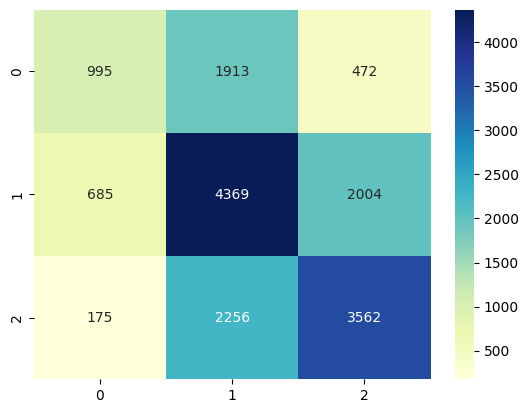

In [ ]:
labels = y_test - 1
predictions = pipeline.predict(X_test.values)
print("\nTRAINING SCORE:")
acc = accuracy_score(labels, predictions)
print('Accuracy: %f' % acc)
recall = recall_score(labels, predictions, average='macro')
print('Recall: %f' % recall)
precision = precision_score(labels, predictions, average='macro')
print('Precision: %f' % precision)
f1 = f1_score(labels, predictions, average='macro')
print('F1: %f' % f1)
confusion_matrix = tf.math.confusion_matrix(labels, predictions)
conf_mat = tf.math.confusion_matrix(labels, predictions)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt="d")
plt.show();

* After applying the MLP method, we obtained an accuracy of **54%**. Additionally, the model achieved acceptable scores for recall, precision, and F1 score with the following parameters: Number of Hidden Layers, Hidden Layer Size, Activation Function, .... Furthermore, the scores of the training set and test set do not differ significantly, indicating that the model is not overfitting and can generalize well to unseen data. Therefore, this suggests that the model is stable and acceptable for predicting interest rate loan ratios.

## Compare with CatBoost Classifier

In [ ]:
cat = CatBoostClassifier(learning_rate = 0.01, depth = 5, iterations = 100, verbose = 0)
#scaler = St
pipe = Pipeline(steps=[("scaler", RobustScaler()),("catboost", cat)]) #Build a pipeline with a scaler and a model
pipe.fit(X_train, y_train)
predicted_label = pipe.predict(X_dev)
print(classification_report(y_dev, predicted_label))

              precision    recall  f1-score   support

           1       0.60      0.09      0.15      3381
           2       0.48      0.69      0.57      7058
           3       0.56      0.54      0.55      5992

    accuracy                           0.51     16431
   macro avg       0.55      0.44      0.42     16431
weighted avg       0.54      0.51      0.48     16431



* It can be seen that after using the `CatBoost classifier` for the model, we obtained an accuracy of **51%** with the following parameters: `learning_rate = 0.01, depth = 5, iterations = 100`. Besides, the scores of class in precision, recall, and f1-score are acceptable. It is possible to make stable predictions with this model compared to other models.


* In summary, the `MLP` model achieved an accuracy of **54%** and provided reliable predictions for interest rate loan ratios. It demonstrated stable performance without overfitting, as indicated by lightly difference between the training and test set scores. On the other hand, the `CatBoost` model achieved an accuracy of **51%** and also provided acceptable precision, recall, and F1 score. However, `MLP` outperformed CatBoost in terms of accuracy. Overall, MLP is the preferred choice for accurate predictions in this scenario.

## Get the Feature Important to quantify the importance of features

<Axes: >

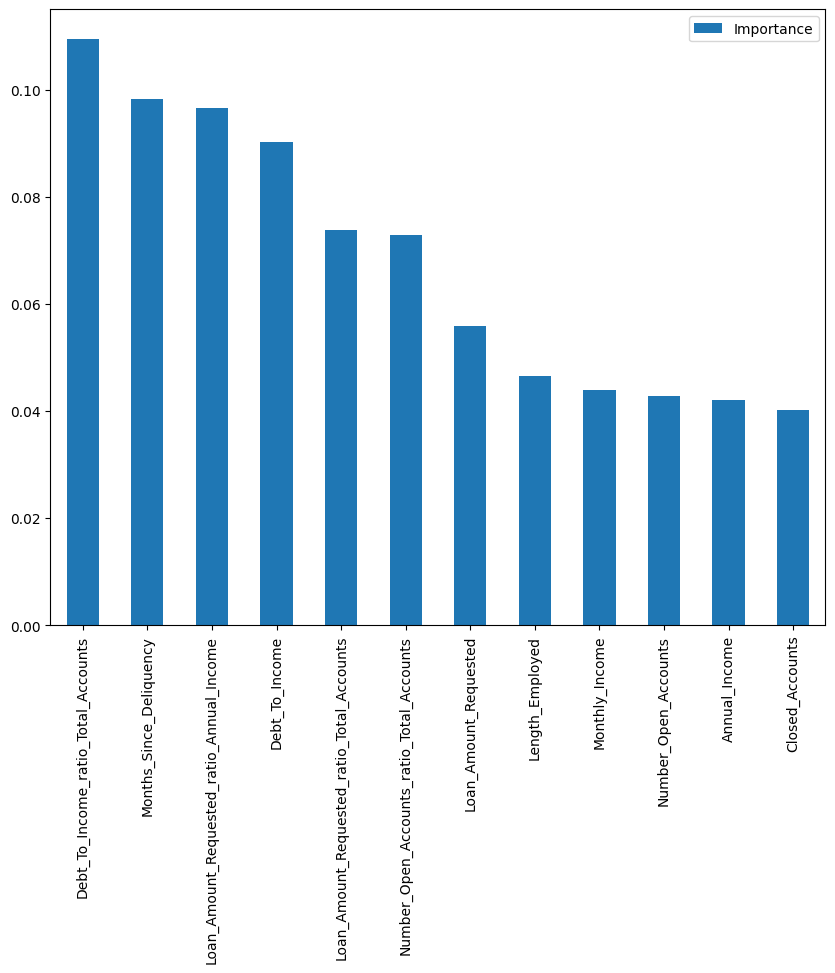

In [ ]:
model_importance = DecisionTreeClassifier()
model_importance.fit(X, y)
feat_importances = pd.DataFrame(model_importance.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances = feat_importances[feat_importances["Importance"] > 0.04]
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(10,8))

* Using the `Decision Tree` algorithm to represent the importance of features in the model, the following are the features (around 11 ones) with an importance level greater than 4%.